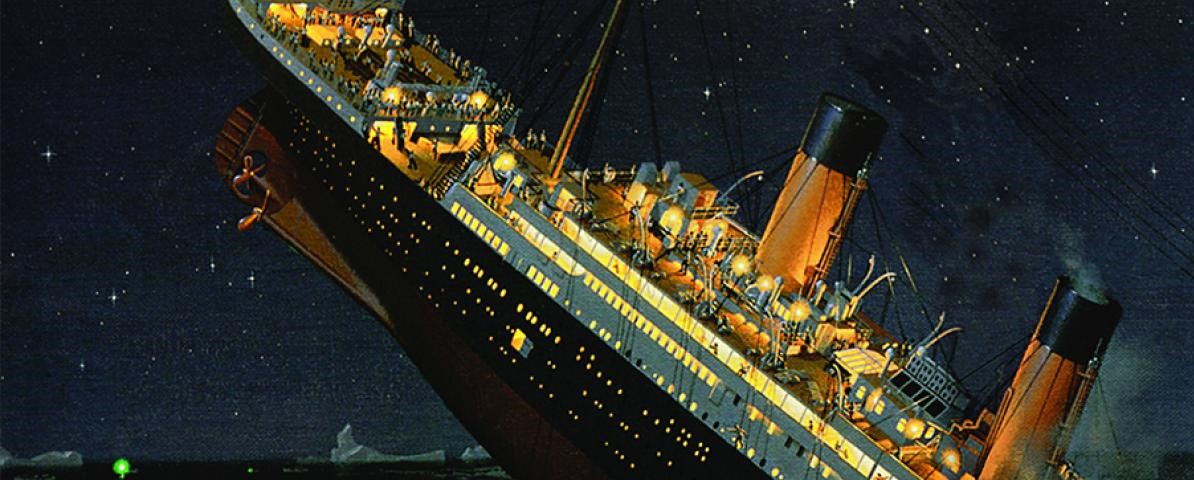

**We are using the Titanic Dataset here. It contains both numerical and string values.**

# **The predefined columns are:**
*   Passenger ID - To identify unique passengers
*   Survived - If they survived or not
*   P Class - The class passengers travelled in
*   Name - Passenger Name
*   Sex - Gender of Passenger
*   Age - Age of passenger  
*   Fare - Amount paid for the ticket

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# **Data Wrangling Function**

**The wrangle function processes the Titanic dataset by performing several steps including displaying initial observations, examining data types and missing values, checking for duplicates, and replacing certain values in specific columns. Below is the detailed implementation of the function.**

In [122]:
def wrangle(data_path):
    titanic_data = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(titanic_data.head(10))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(titanic_data.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", titanic_data.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(titanic_data.describe().transpose())
    print()

    # Columns with null values
    print("Columns with null values:")
    columns_with_null = titanic_data.columns[titanic_data.isnull().any()].tolist()
    print(columns_with_null)
    print()

    # Dropping specified columns
    columns_to_drop = ["Name", "SibSp", "Parch","Ticket", "Cabin", "Embarked"]
    titanic_data.drop(columns_to_drop, axis=1, inplace=True)

    # Replacing 0 with 'Non Survived' and 1 with 'Survived' in 'SurviveVid'
    # titanic_data['Survived'].replace({0: 'Non Survived', 1: 'Survived'}, inplace=True)
    titanic_data['Pclass'].replace({1: '1st', 2: '2nd', 3:"3rd"}, inplace=True)

    return titanic_data

# Example usage
data_path = "titanic.csv"
data = wrangle(data_path)

Initial Observations:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr.

In [123]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3rd,male,22.0,7.2500
1,2,1,1st,female,38.0,71.2833
2,3,1,3rd,female,26.0,7.9250
3,4,1,1st,female,35.0,53.1000
4,5,0,3rd,male,35.0,8.0500


In [124]:
data['Age'].fillna(data.Age.mean(), inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

# **pie chart presenting the male/female proportion**

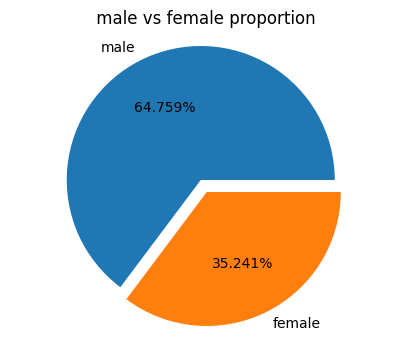

In [125]:
totalSex = data.Sex.value_counts().reset_index()
plt.figure(figsize=(5,4))
plt.pie(totalSex['count'],labels=totalSex['Sex'], autopct="%1.3F%%" , explode=[0.1,0])
plt.title(" male vs female proportion")
plt.axis('equal')
plt.show()

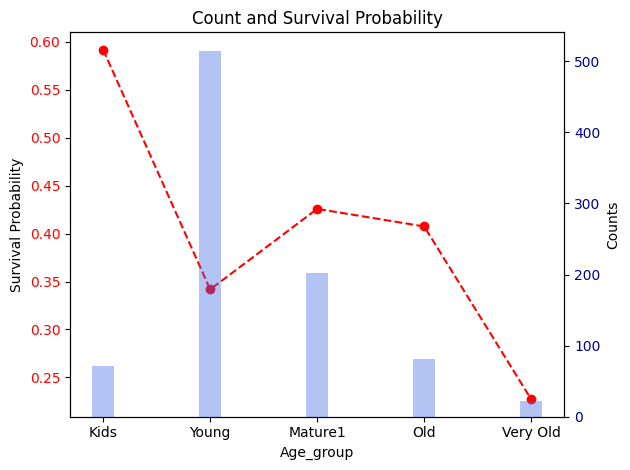

In [126]:
# Mapping Age with group (kids, young, maturel, old, very old)
data.loc[data['Age'] <= 13, 'Age_group'] = "Kids"
data.loc[(data['Age'] > 13) & (data['Age'] <= 30), 'Age_group'] = "Young"
data.loc[(data['Age'] > 30) & (data['Age'] <= 45), 'Age_group'] = "Mature1"
data.loc[(data['Age'] > 45) & (data['Age'] <= 60), 'Age_group'] = "Old"
data.loc[(data['Age'] > 60) & (data['Age'] <= 100), 'Age_group'] = "Very Old"

# Calculate survival probability for each fare level
age_survival_grouped = data.groupby('Age_group').agg({'Age': ['min', 'max'], 'Survived': ['mean', 'count']}).reset_index()
age_survival_grouped.columns = ['Age_group', 'Age_min' , 'Age_max', 'Survival_proba', 'Count']
age_survival_grouped

sorted_indices = ["Kids", "Young", "Mature1", "Old", "Very Old"]
# Calculate the counts
variable = 'Age_group'
counts = data[variable].value_counts()
counts = counts.reindex(sorted_indices)


# Calculate the probability of survival
survived = data[data['Survived'] == 1][variable].value_counts().sort_index()
not_survived = data[data['Survived'] == 0][variable].value_counts().sort_index()
survival_prob = survived / (survived + not_survived)
survival_prob = survival_prob.reindex(sorted_indices)

# Create subplots with shared x-axis
fig, ax1 = plt.subplots()

# Plot the survival probability using scatter plot markers and lines on the left y-axis
ax1.plot(survival_prob.index, survival_prob.values, marker='o', linestyle='--', color='red')
ax1.set_ylabel('Survival Probability', color='black')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin y-axis for the left side
ax2 = ax1.twinx()

#Plot the count bars on the right y-axis
ax2.bar(counts.index, counts.values, alpha=0.4, width=0.2, color='royalblue')
ax2.set_ylabel('Counts', color='black')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Set the x-axis label and title
ax1.set_xlabel(variable)
plt.title('Count and Survival Probability')

# Adjust the layout of subplots
plt.tight_layout()

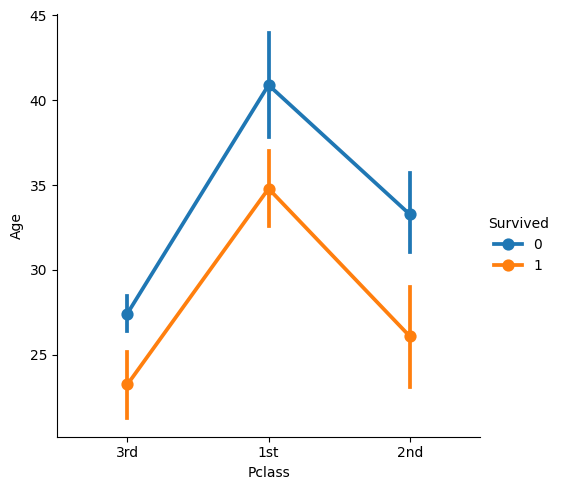

In [127]:
# Replacing 0 with 'Non Survived' and 1 with 'Survived' in 'SurviveVid'
# data['Survived'].replace({0: 'Non Survived', 1: 'Survived'}, inplace=True)
sns.catplot(y = 'Age', x='Pclass', hue='Survived',kind='point', data=data)
##Passengers who did not survive (Survived = 0) were generally older than those who did survive (Survived = 1) across all classes.
##This suggests that younger passengers had a higher survival rate.

**Plot the distribution of each numerical feature**

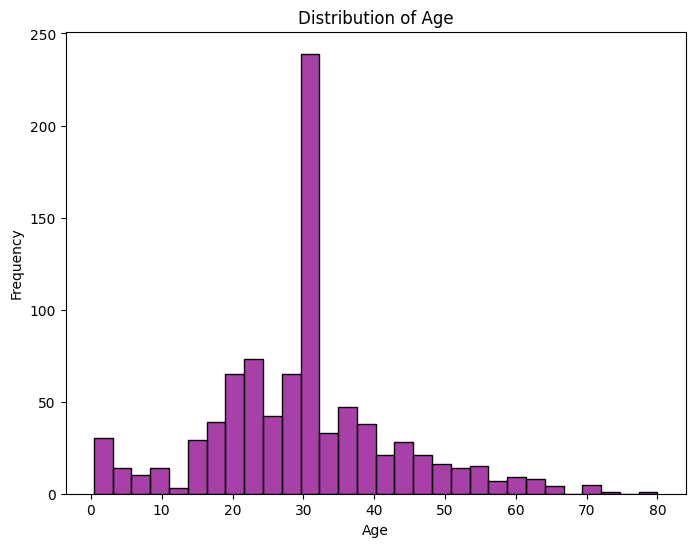

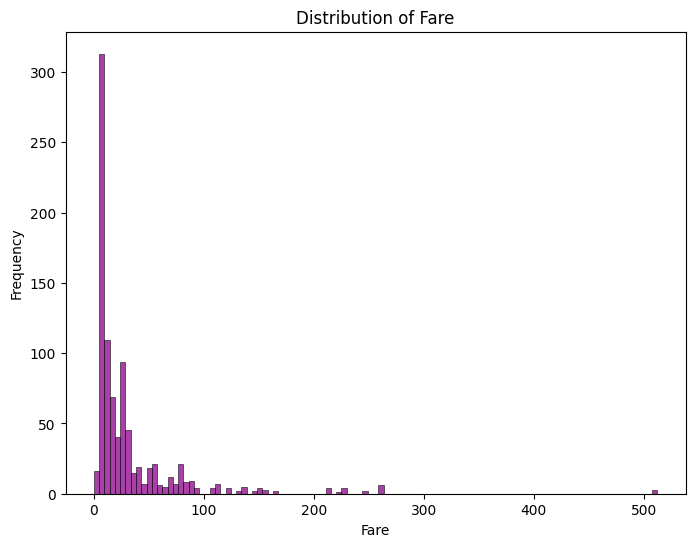

In [128]:
# Plot the distribution of each numerical feature
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, color = "darkmagenta")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [129]:
# Correlation analysis
correlation = data[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(data['Pclass'], data['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.091566
Fare  0.091566  1.000000
Survived    0    1
Pclass            
1st        80  136
2nd        97   87
3rd       372  119


# **Plot the distribution of Age (male vs female)**
# **This allows us to see if there are differences in the age distribution between males and females.**




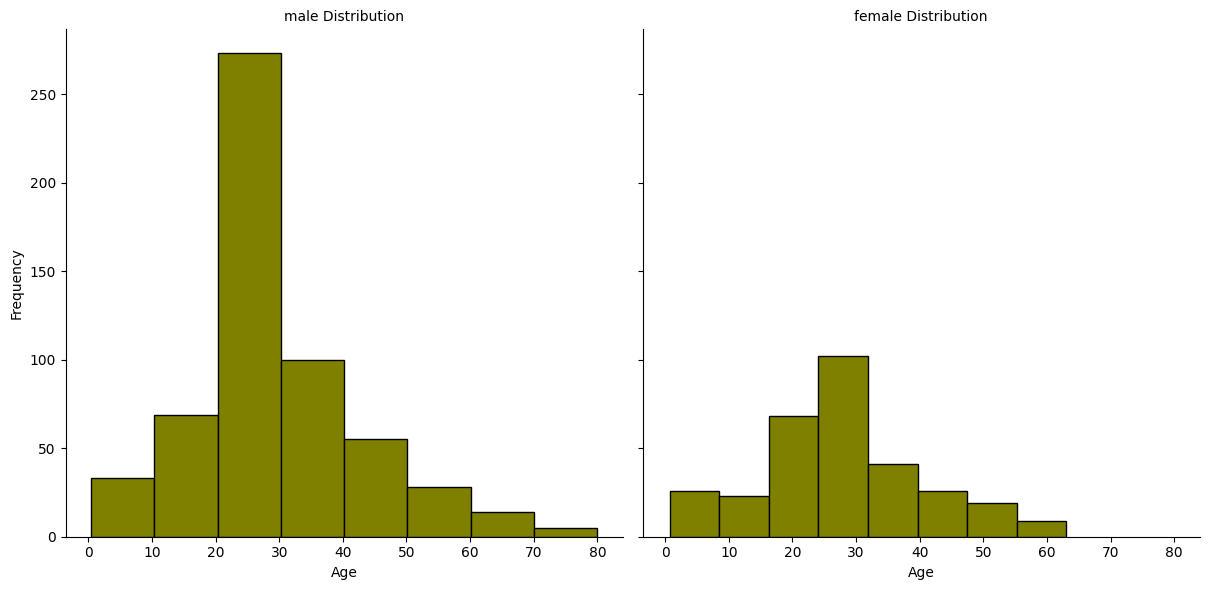

In [130]:
g = sns.FacetGrid(data, col='Sex', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=8, color='olive', edgecolor='black')

g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name} Distribution')
plt.show()

# **show the number of males and females**
**numbers of males more than numbers of females**

<ipython-input-131-1261de112d6a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Sex", palette=['blue', 'orange'])


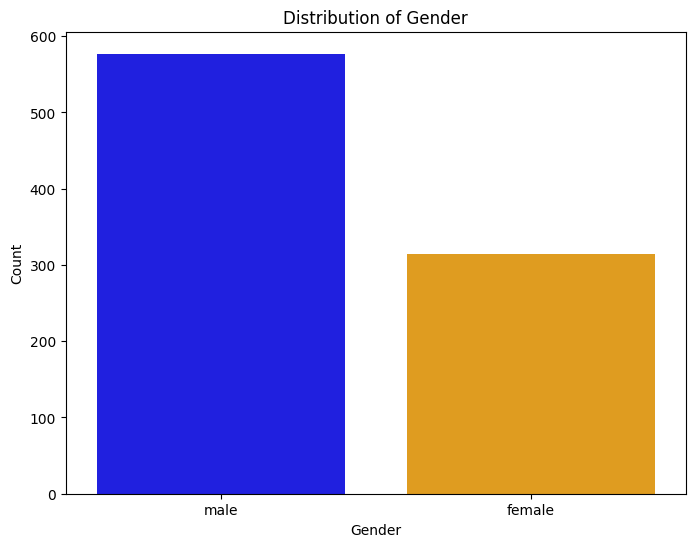

In [131]:
# Plot the distribution of Sex where male is blue and female is orange
categorical_features = 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Sex", palette=['blue', 'orange'])
plt.title(f'Distribution of {"Gender"}')
plt.xlabel("Gender")
plt.ylabel('Count')
plt.show()

# **show the survival distribution within each gender**

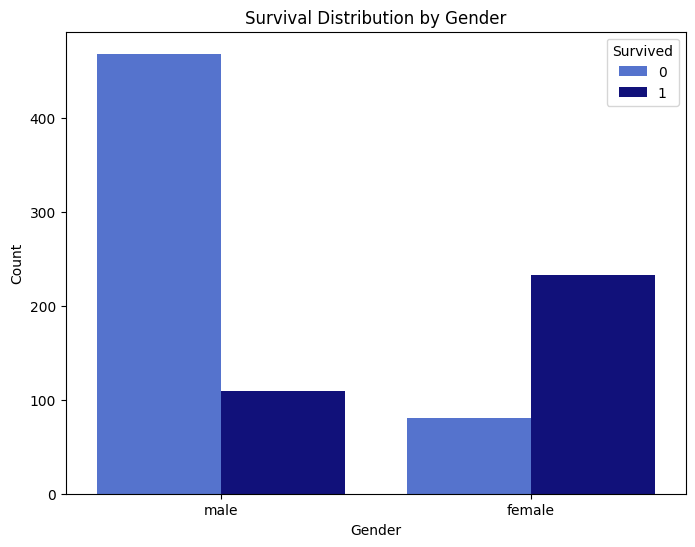

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette=['royalblue', 'darkblue'])
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

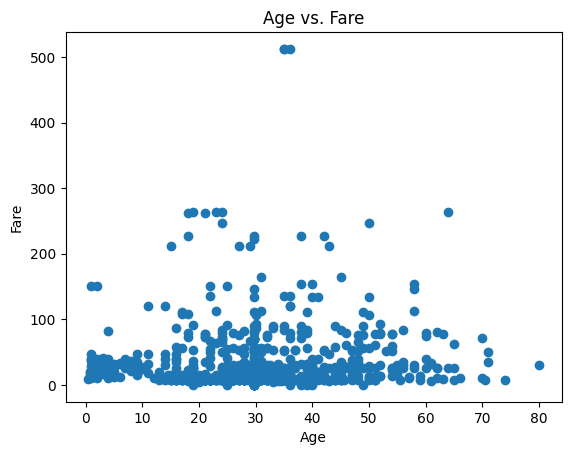

In [133]:
# Scatter plot
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

In [151]:
# Separate features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Encode categorical variables using pd.get_dummies()
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy:", acc_log)

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVM Accuracy:", acc_svc)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Gaussian Naive Bayes Accuracy:", acc_gaussian)

# Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
random_forest_model.fit(X_train, y_train)
# Score of Random Forest model
y_pred_random_forest = random_forest_model.predict(X_test)
acc_random_forest = round(accuracy_score(y_test, y_pred_random_forest) * 100, 2)
print("Random Forest Accuracy:", acc_random_forest)

Logistic Regression Accuracy: 79.07
SVM Accuracy: 65.03
Gaussian Naive Bayes Accuracy: 77.11
Random Forest Accuracy: 82.68


In [152]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression',
              'Random Forest',"GaussianNB"],
    'Score': [acc_svc, acc_log,
              acc_random_forest,acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,82.68
1,Logistic Regression,79.07
3,GaussianNB,77.11
0,Support Vector Machines,65.03


# Random Forests is the most accurate (82.68%) in predicting the survival of passengers and they are select to predicted the testing data.

Text(95.72222222222221, 0.5, 'Truth')

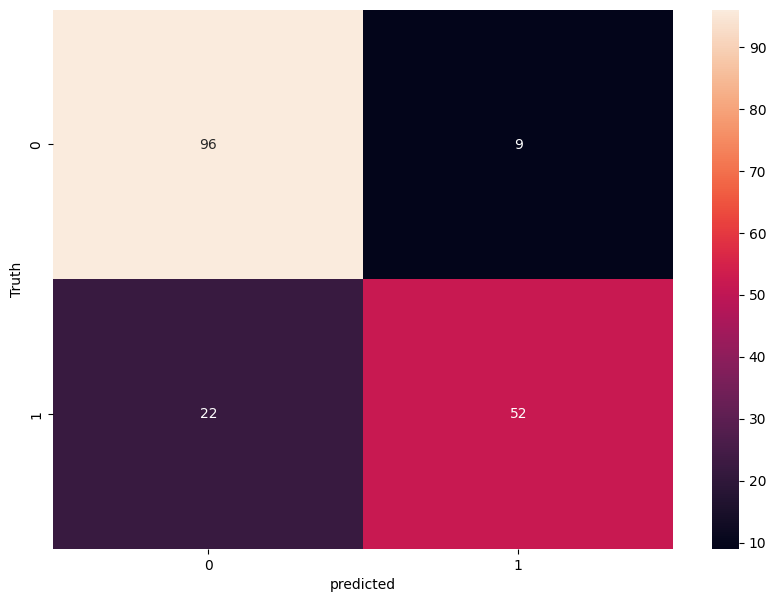

In [154]:
y_pred = random_forest_model.predict(X_test)
ConfusionMetricModel = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')